<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/EEMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis using EMD and Dilated Convolutional Neural Networks¶**
https://github.com/3catz/deeplearning_timeseries/blob/master/Air_Quality_Time_Series_Series_Forecasting_with_EEMD_and_Fully_Convolutional_Neural_Networks.ipynb

In [1]:
!pip install EMD-signal
!pip install auto_ml
!pip install pyhht
!pip install six
#!pip install -U scikit-learn scipy matplotlib

#import six
#import sys
#sys.modules['sklearn.externals.six'] = six
#from auto_ml import Predictor
#from auto_ml.utils import get_boston_dataset
#from auto_ml.utils_models import load_ml_model

from PyEMD import EEMD 
eemd = EEMD(max_imfs=8)
#pip install PeakUtils
from sklearn.preprocessing import MinMaxScaler, RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score

import matplotlib.pyplot as plt
import os 
from scipy.integrate import odeint
#keras
from keras.models import *
from keras.layers import * 
from keras.optimizers import *
from keras.callbacks import *
from keras import backend as K


     |████████████████████████████████| 64 kB 1.8 MB/s 
     |████████████████████████████████| 81 kB 6.7 MB/s 
     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 71 kB 3.1 MB/s 
     |████████████████████████████████| 10.4 MB 45.0 MB/s 
     |████████████████████████████████| 2.9 MB 41.1 MB/s 
     |████████████████████████████████| 627 kB 42.5 MB/s 
     |████████████████████████████████| 22.3 MB 2.8 MB/s 
     |████████████████████████████████| 150 kB 43.3 MB/s 
     |████████████████████████████████| 81 kB 6.2 MB/s 
     |████████████████████████████████| 219 kB 17.0 MB/s 
     |████████████████████████████████| 162 kB 41.8 MB/s 
     |████████████████████████████████| 162 kB 41.5 MB/s 
     |████████████████████████████████| 162 kB 46.4 MB/s 
     |████████████████████████████████| 3.3 MB 25.2 MB/s 
     |████████████████████████████████| 112 kB 48.2 MB/s 
     |████████████████████████████████| 108 kB 49.4 MB/s 
     |█████████████████

In [2]:
def series_to_supervised(data, n_in, n_out, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [4]:
data= pd.read_csv("/content/System load forecast.csv")

In [5]:
import numpy as np
data = np.genfromtxt("/content/System load forecast.csv", delimiter = ","); data = np.asarray(data); data.shape

(52416,)

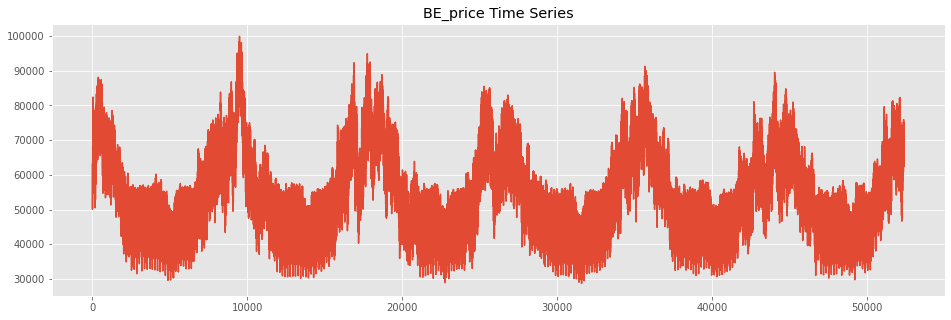

In [6]:
plt.figure(figsize=(16,5))
plt.plot(data)
plt.title("BE_price Time Series")
plt.show()

In [7]:
data = np.transpose(data)

In [8]:
# before you do the EMD, cut out the out of sample part so that the EMDs are not constructed with those future values and information contained within them

in_sample = data[:-17472]; out_sample = data[-17472:]
print(in_sample.shape)
print(in_sample)

(34944,)
[63000. 58800. 58500. ... 64515. 62554. 67342.]


In [9]:
in_sample = in_sample.reshape(-1,1)
out_sample = out_sample.reshape(-1,1)
print(in_sample)


[[63000.]
 [58800.]
 [58500.]
 ...
 [64515.]
 [62554.]
 [67342.]]


In [10]:
#eemd for in-sample
eemd = EEMD()
eemd.extrema_detection = "simple"
t = np.linspace(0, in_sample.shape[0], in_sample.shape[0])
t = t.reshape(-1,1)
print(t.shape, in_sample.shape)
t = np.squeeze(t)
in_sample = np.squeeze(in_sample)




(34944, 1) (34944, 1)


In [11]:
#eemd for in-sample
imfs_in = eemd(in_sample, t, 8)

print(imfs_in.shape)

(9, 34944)


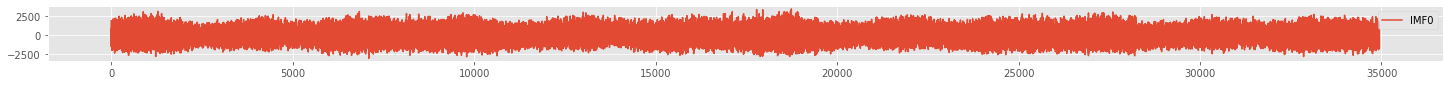

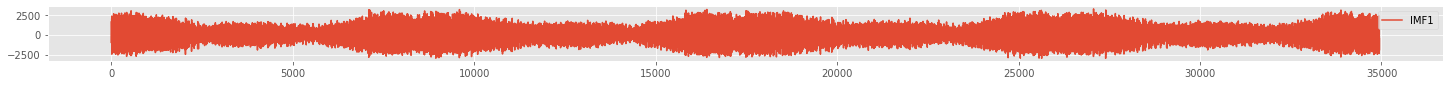

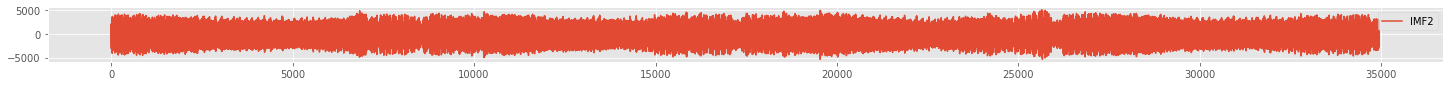

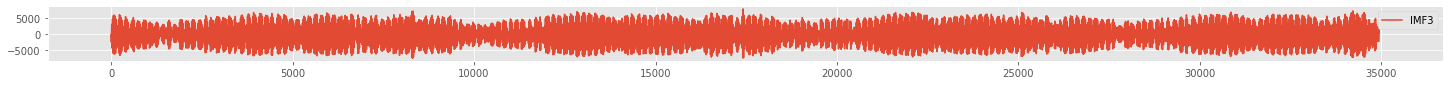

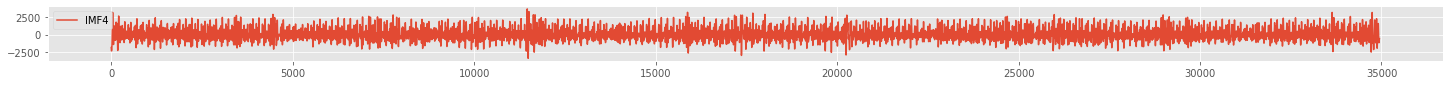

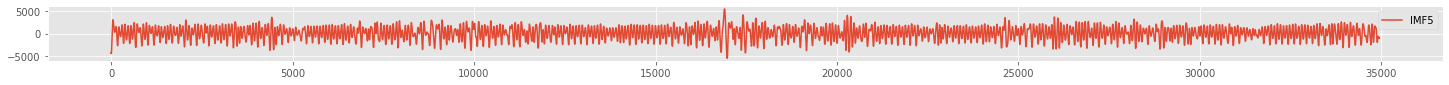

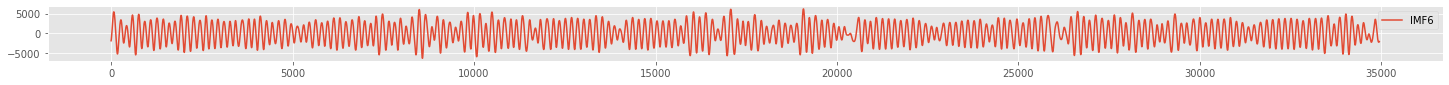

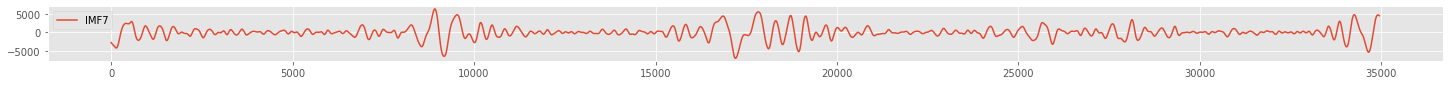

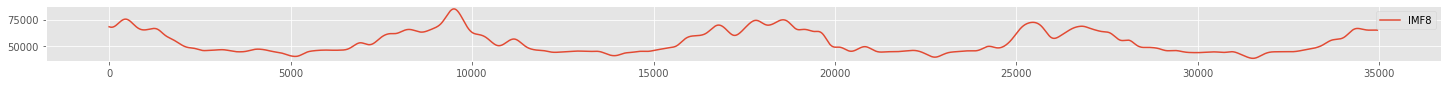

In [12]:
for i in range(len(imfs_in)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs_in[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [13]:
#eemd for out-sample
eemd = EEMD()
eemd.extrema_detection = "simple"
t_out = np.linspace(0, out_sample.shape[0], out_sample.shape[0])
t_out = t_out.reshape(-1,1)
print(t_out.shape, out_sample.shape)
t_out = np.squeeze(t_out)
out_sample = np.squeeze(out_sample)


(17472, 1) (17472, 1)


In [14]:
#eemd for out-sample
imfs_out = eemd(out_sample, t_out, 8)

print(imfs_out.shape)

(9, 17472)


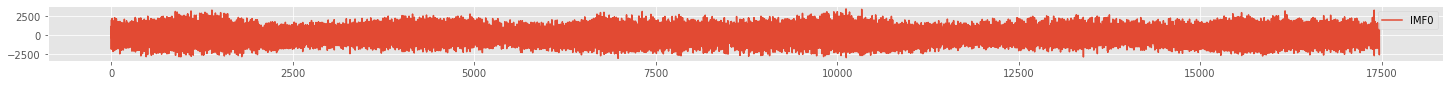

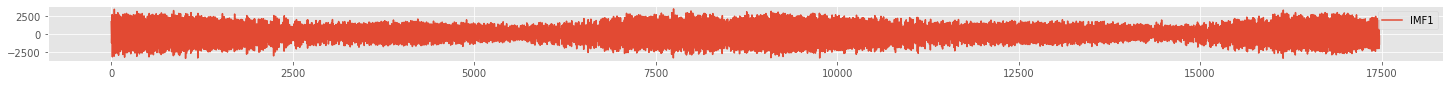

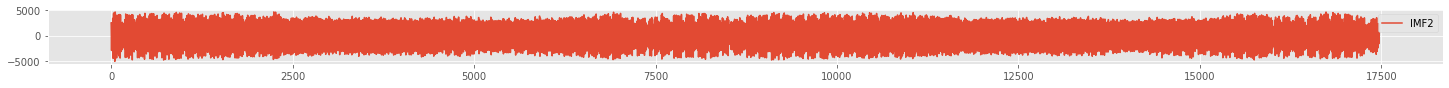

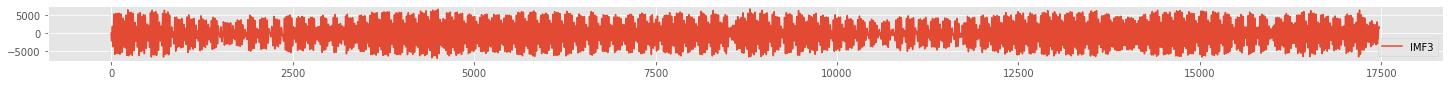

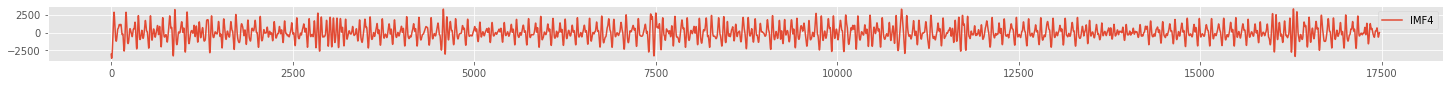

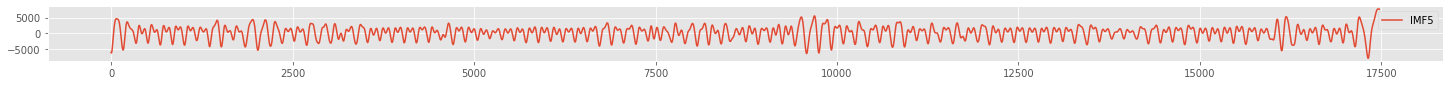

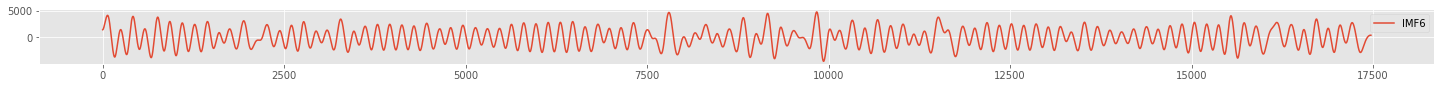

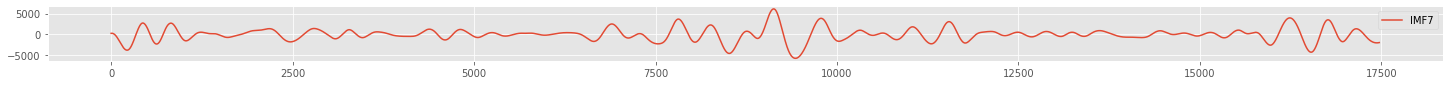

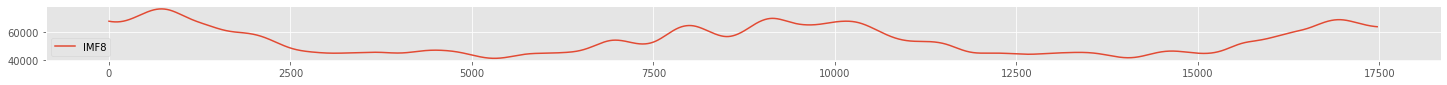

In [15]:
for i in range(len(imfs_out)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs_out[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [16]:
# Save in_sample and out_sample decomposition data
from pandas import DataFrame
import pandas as pd
import csv
Eemd_in_sample=pd.DataFrame(imfs_in).T
Eemd_out_sample=pd.DataFrame(imfs_out).T
#Unscaled decomposed data
#Eemd_in_sample_unscaled=scaler.inverse_transform(Eemd_in_sample['0'])
#Eemd_out_sample_unscaled=scaler.inverse_transform(Eemd_out_sample.reshape(-1,1))
# Save as csv
Eemd_in_sample.to_csv("Eemd_in_sample.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
Eemd_out_sample.to_csv("Eemd_out_sample.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')

# Save as excel
Eemd_in_sample.to_excel("Eemd_in_sample.xlsx", header=True)
Eemd_out_sample.to_excel("Eemd_out_sample.xlsx", header=True)
print(Eemd_in_sample)
print(Eemd_out_sample)


                 0            1            2            3            4  \
0      1845.649367  1608.212533  2082.488678  -196.473667 -1876.642667   
1     -1553.712792  1271.242163  1881.845780  -689.106061 -1998.695087   
2      1069.197094   653.369714   847.709817 -1229.948559 -2101.595380   
3      -556.535241  -106.105456  -624.654530 -1754.764086 -2185.792504   
4      -114.402319  -820.791836 -2010.665962 -2187.754185 -2252.732698   
...            ...          ...          ...          ...          ...   
34939  1268.585306  2374.225896  -752.671101   390.113436  -696.707314   
34940   148.687488   699.874678  -216.672151   392.471777  -657.661043   
34941  -746.392550 -1585.095742    34.094158   430.308894  -628.544408   
34942 -1770.576927 -1972.185397   137.604024   438.621873  -606.339925   
34943   866.299868  -496.087058   302.083695   373.968484  -587.879065   

                 5            6            7             8  
0     -4225.887242 -1873.326491 -2756.877909  6829

In [17]:
Eemd_in_sample

,0,1,2,3,4,5,6,7,8
0,1845.649367,1608.212533,2082.488678,-196.473667,-1876.642667,-4225.887242,-1873.326491,-2756.877909,68293.628098
1,-1553.712792,1271.242163,1881.845780,-689.106061,-1998.695087,-4301.591534,-1828.847041,-2769.308920,68281.051017
2,1069.197094,653.369714,847.709817,-1229.948559,-2101.595380,-4359.050414,-1778.600092,-2781.693797,68268.626606
3,-556.535241,-106.105456,-624.654530,-1754.764086,-2185.792504,-4397.727766,-1722.488304,-2794.032004,68256.355961
4,-114.402319,-820.791836,-2010.665962,-2187.754185,-2252.732698,-4417.210116,-1660.458787,-2806.322184,68244.240203
...,...,...,...,...,...,...,...,...,...
34939,1268.585306,2374.225896,-752.671101,390.113436,-696.707314,-1077.052557,-2157.946831,4590.493707,65139.402428
34940,148.687488,699.874678,-216.672151,392.471777,-657.661043,-1070.202415,-2141.034915,4580.588084,65136.926173
34941,-746.392550,-1585.095742,34.094158,430.308894,-628.544408,-1059.497818,-2122.734166,4570.422103,65134.418998
34942,-1770.576927,-1972.185397,137.604024,438.621873,-606.339925,-1045.000909,-2103.050579,4559.997435,65131.881168


In [18]:

# Merge in_ and out_samples in one file and save the full decomposed sample  

frames = [Eemd_in_sample, Eemd_out_sample]

BE_price_Eemd = pd.concat(frames)
BE_price_Eemd=BE_price_Eemd.reset_index()
del BE_price_Eemd[BE_price_Eemd.columns[0]]
BE_price_Eemd.to_csv("BE_price_Eemd.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
BE_price_Eemd.to_excel("BE_price_Eemd.xlsx", header=True)
print(BE_price_Eemd)

                 0            1            2            3            4  \
0      1845.649367  1608.212533  2082.488678  -196.473667 -1876.642667   
1     -1553.712792  1271.242163  1881.845780  -689.106061 -1998.695087   
2      1069.197094   653.369714   847.709817 -1229.948559 -2101.595380   
3      -556.535241  -106.105456  -624.654530 -1754.764086 -2185.792504   
4      -114.402319  -820.791836 -2010.665962 -2187.754185 -2252.732698   
...            ...          ...          ...          ...          ...   
52411  1305.650382  1893.390143  -654.469166  1757.781559  -126.876180   
52412   301.442297   642.398795  -274.225491  1727.621327   -83.140058   
52413  -739.034371 -1081.890853    -4.217352  1688.290522   -49.181763   
52414 -2573.477876 -1517.874831   249.099419  1615.251460   -24.941069   
52415  1476.433638  -283.759305   505.513170  1492.467242    -9.773236   

                 5            6            7             8  
0     -4225.887242 -1873.326491 -2756.877909  6829